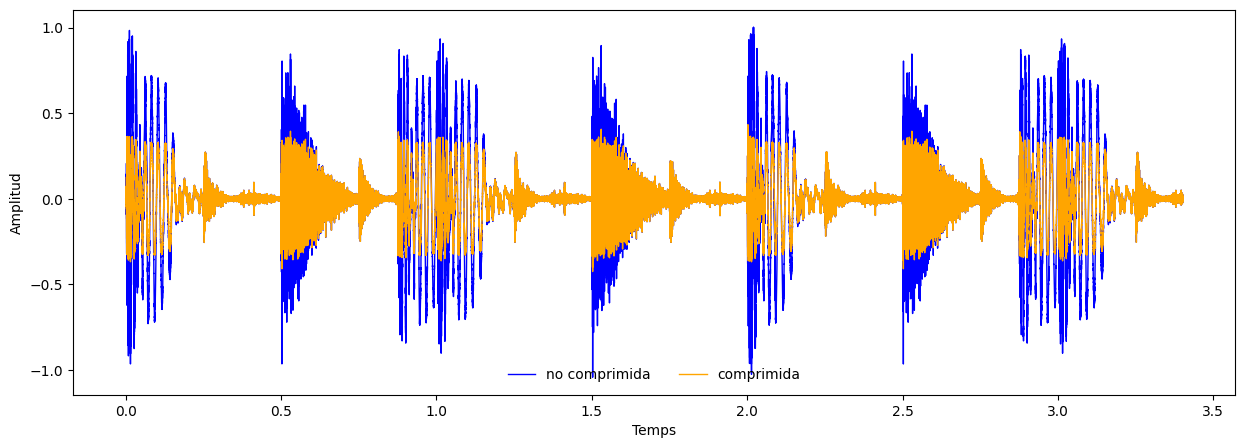

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

audio1 = 'uncompressed.wav'
audio2 = 'compressed.wav'
input_data1 = read(audio1)
n_samples = len(input_data1[1])
duration = n_samples/input_data1[0]
time = np.linspace(0, duration, num=n_samples)
slice = 150000
plt.figure(figsize=(15,5))

plt.plot(time[:slice],input_data1[1][:slice]/30000,'blue',label = 'no comprimida',linewidth=1)

input_data2 = read(audio2)
plt.plot(time[:slice],input_data2[1][:slice]/30000,'orange', label = 'comprimida', linewidth=1)
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.xlabel('Temps')
plt.ylabel('Amplitud')
plt.show()

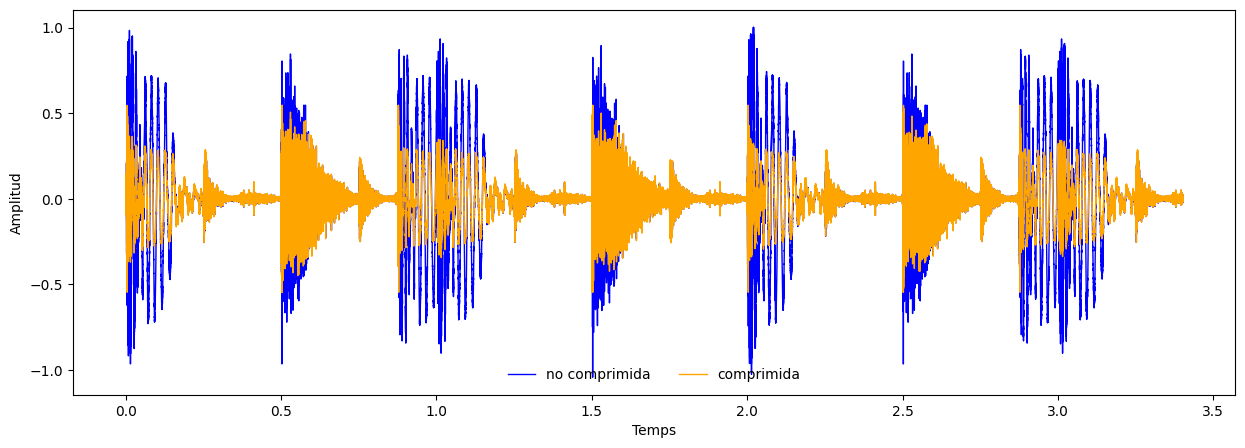

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

audio1 = 'uncompressed.wav'
audio2 = 'fast_attack_release.wav'
input_data1 = read(audio1)
n_samples = len(input_data1[1])
duration = n_samples/input_data1[0]
time = np.linspace(0, duration, num=n_samples)
slice = 150000
plt.figure(figsize=(15,5))

plt.plot(time[:slice],input_data1[1][:slice]/30000,'blue',label = 'no comprimida',linewidth=1)

input_data2 = read(audio2)
plt.plot(time[:slice],input_data2[1][:slice]/60000,'orange', label = 'comprimida', linewidth=1)
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.xlabel('Temps')
plt.ylabel('Amplitud')
plt.show()

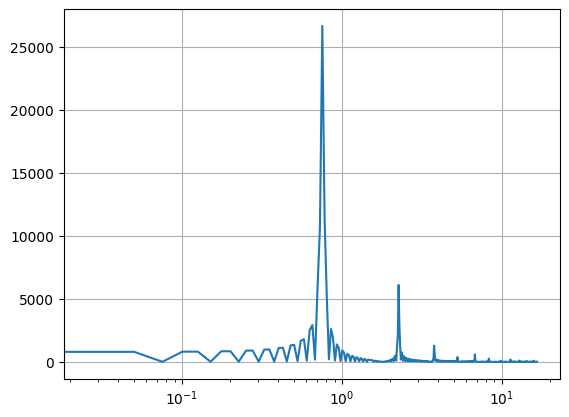

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np

audio1 = 'tone_clean.wav'
audio2 = 'outpreamp.wav'
input_data1 = read(audio2)

n_samples = len(input_data1[1])
duration = n_samples/input_data1[0]
time = np.linspace(0, duration, num=n_samples)

yf = fft(input_data1[1])
xf = fftfreq(n_samples, duration)[:n_samples//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/n_samples * np.abs(yf[0:n_samples//2]))
plt.xscale('log')
plt.grid()
plt.show()


In [ ]:
from scipy.signal import blackmanharris
from numpy.fft import rfft, irfft
from numpy import argmax, sqrt, mean, absolute, arange, log10
import numpy as np


def rms_flat(a):
    """
    Return the root mean square of all the elements of *a*, flattened out.
    """
    return sqrt(mean(absolute(a)**2))


def find_range(f, x):
    """
    Find range between nearest local minima from peak at index x
    """
    for i in arange(x+1, len(f)):
        if f[i+1] >= f[i]:
            uppermin = i
            break
    for i in arange(x-1, 0, -1):
        if f[i] <= f[i-1]:
            lowermin = i + 1
            break
    return (lowermin, uppermin)


def THDN(signal, sample_rate):
    """
    Measure the THD+N for a signal and print the results
    Prints the estimated fundamental frequency and the measured THD+N.  This is
    calculated from the ratio of the entire signal before and after
    notch-filtering.
    Currently this tries to find the "skirt" around the fundamental and notch
    out the entire thing.  A fixed-width filter would probably be just as good,
    if not better.
    """
    # Get rid of DC and window the signal

    # TODO: Do this in the frequency domain, and take any skirts with it?
    signal =signal - mean(signal)
    windowed = signal * blackmanharris(len(signal))  # TODO Kaiser?

    # Measure the total signal before filtering but after windowing
    total_rms = rms_flat(windowed)

    # Find the peak of the frequency spectrum (fundamental frequency), and
    # filter the signal by throwing away values between the nearest local
    # minima
    f = rfft(windowed)
    i = argmax(abs(f))

    # Not exact
    print('Frequency: %f Hz' % (sample_rate * (i / len(windowed))))
    lowermin, uppermin = find_range(abs(f), i)
    f[lowermin: uppermin] = 0

    # Transform noise back into the signal domain and measure it
    # TODO: Could probably calculate the RMS directly in the frequency domain
    # instead
    noise = irfft(f)
    THDN = rms_flat(noise) / total_rms
    print("THD+N:     %.4f%% or %.1f dB" % (THDN * 100, 20 * log10(THDN)))

audio1 = 'tone_clean.wav'
audio2 = 'outpreamp.wav'
input_data1 = read(audio1)

THDN(input_data1[1], input_data1[0])

Frequency: 1000.000000 Hz
THD+N:     3.3047% or -29.6 dB


In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

audio1 = 'uncompressed.wav'
audio2 = 'comp_slow_atac.wav'
input_data1 = read(audio1)
n_samples = len(input_data1[1])
duration = n_samples/input_data1[0]
time = np.linspace(0, duration, num=n_samples)
slice = 150000
plt.figure(figsize=(15,5))

plt.plot(time[:slice],input_data1[1][:slice]/30000,'blue',label = 'no comprimida',linewidth=1)

input_data2 = read(audio2)
plt.plot(time[:slice],input_data2[1][:slice]/3e9,'orange', label = 'comprimida', linewidth=1)
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.xlabel('Temps')
plt.ylabel('Amplitud')
plt.show()